<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">Perhitungan Episenter</p>
    <h1>Sesi: Penentuan Episenter dengan Metode Lingkaran</h1>
</div>

## Sekilas Dasar

Penentuan episenter metode lingkaran memanfaatkan minimal 3 stasiun seismik. Data yang dibutuhkan dari setiap stasiun adalah waktu tiba gelombang P dan gelombang S yang kemudian diselisihkan untuk mendapatkan waktu S-P. Selisih waktu S-P ini dipakai untuk memperkirakan jarak yang sudah ditempuh yang pada contoh ini akan mengaplikasikan metode Tau P. Metode ini sering juga disebut *circle and chord* karena memanfaatkan perpotongan lingkaran dan garis perpotongannya.

![circle_chord](figures/circle_and_chord.png)

Dalam gambar (Havskov et al, 2002) di atas S merupakan stasiun seismik dan d merupakan jarak yang didapatkan dari pencocokan nilai S-P dengan jarak.

### Data
Data yang akan kita gunakan adalah data waktu tiba gelombang P dan gelombang S dari gempa Laut Flores M7,3 yang direkam di stasiun KAPI, AUDHS, dan BMEBF. Data waktu tiba ini dikonversi kedalam format `UTCDateTime` `obspy`:

In [1]:
from obspy import UTCDateTime

KAPI_P = UTCDateTime("2021-12-14T03:21:19")
KAPI_S = UTCDateTime("2021-12-14T03:22:02")

MBWA_P = UTCDateTime("2021-12-14T03:23:40")
MBWA_S = UTCDateTime("2021-12-14T03:26:13")

BMEBF_P = UTCDateTime("2021-12-14T03:22:53")
BMEBF_S = UTCDateTime("2021-12-14T03:24:49")

### Selisih waktu tiba S dan P
Selisih S-P kemudian dapat kita cari dengan cara yang sederhana yaitu:

In [2]:
KAPI_SP = KAPI_S-KAPI_P
MBWA_SP = MBWA_S-MBWA_P
BMEBF_SP = BMEBF_S-BMEBF_P

print("KAPI_SP",KAPI_SP,"sekon")
print("MBWA_SP",MBWA_SP,"sekon")
print("BMEBF_SP",BMEBF_SP,"sekon")

KAPI_SP 43.0 sekon
MBWA_SP 153.0 sekon
BMEBF_SP 116.0 sekon


### Mencari jarak dengan *rule of thumb*

Dari nilai SP sebenarnya kita langsung dapat mencari radius lingkaran/jarak dengan rumus Havskov et al (2002): 

$$jarak=(SP-2)\times10,$$

dengan satuan kilometer, apabila akan dijadikan derajat maka kita bagi dengan angka 111,26 km:

In [3]:
jarak=[(SP-2)*10/111.26 for SP in [KAPI_SP,MBWA_SP,BMEBF_SP]]
jarak

[3.6850620168973576, 13.571813769548804, 10.246269998202408]

Kemudian dapat kita plot:

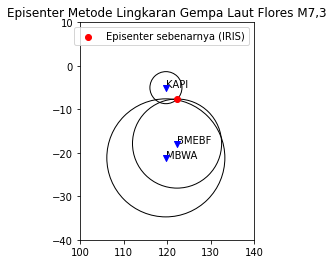

In [6]:
import matplotlib.pyplot as plt

# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
MBWA_coor=(119.7313,-21.159)
BMEBF_coor=(122.309427,-17.86832)

nama_stasiun = ["KAPI","MBWA","BMEBF"]

figure, ax = plt.subplots()

ax.set_aspect(1)
for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               jarak,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)


ax.set_title('Episenter Metode Lingkaran Gempa Laut Flores M7,3')
ax.set_xlim(100,140)
ax.set_ylim(-40,10)
ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")
ax.legend()
plt.show()

Hasil pendekatan ini cukup tetapi belum akurat, kita bisa menambah akurasi dengan memanfaatkan Tau P.

### Mencari jarak berdasarkan S-P
#### Pengenalan modul `TauPyModel` dari `obspy`

Sebelum mencari jarak berdasarkan S-P kita akan berkenalan dahulu dengan modul `TauPyModel` dari `obspy`. Modul ini memungkinkan kita mencari nilai waktu tempuh dari gempa ke stasiun dengan lokasi dan kedalaman tertentu. Modul ini berdasarkan algoritma Tau P dan bisa kita aplikasikan dengan berbagai model kecepatan yang sudah ada, kita akan memakai model IASP91. Selain menghitung waktu tempuh, modul juga dapat mengeplot jejak sinar/*raypath*:

In [7]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

#contoh menghitung waktu tempuh gempa kedalaman 10 km dengan jarak episenter-stasiun adalah 60 derajat
arrivals = model.get_travel_times(source_depth_in_km=10, #kedalaman dlm km
                                      distance_in_degree=60)# jarak dalam derajat

print(arrivals)

26 arrivals
	P phase arrival at 606.671 seconds
	pP phase arrival at 609.890 seconds
	sP phase arrival at 611.192 seconds
	PcP phase arrival at 652.518 seconds
	PP phase arrival at 738.998 seconds
	ScP phase arrival at 893.582 seconds
	PcS phase arrival at 894.854 seconds
	PKiKP phase arrival at 1031.517 seconds
	pPKiKP phase arrival at 1034.958 seconds
	sPKiKP phase arrival at 1036.212 seconds
	S phase arrival at 1099.990 seconds
	pS phase arrival at 1104.008 seconds
	sS phase arrival at 1105.473 seconds
	SP phase arrival at 1111.006 seconds
	PS phase arrival at 1112.511 seconds
	ScS phase arrival at 1197.222 seconds
	SKiKP phase arrival at 1244.354 seconds
	SS phase arrival at 1337.911 seconds
	PKIKKIKP phase arrival at 1871.235 seconds
	SKIKKIKP phase arrival at 2084.064 seconds
	PKIKKIKS phase arrival at 2085.318 seconds
	SKIKKIKS phase arrival at 2297.978 seconds
	PKIKPPKIKP phase arrival at 2371.749 seconds
	PKPPKP phase arrival at 2382.176 seconds
	PKPPKP phase arrival at 2393.4

untuk mengeplot kita dapat menggunakan `get_raypaths`:

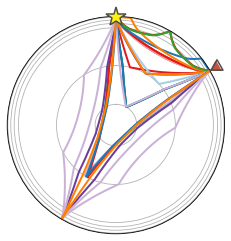

In [8]:
raypaths = model.get_ray_paths(source_depth_in_km=10, #kedalaman dlm km
                                      distance_in_degree=60)# jarak dalam derajat

ax = raypaths.plot_rays()

kita juga dapat membatasi fase apa saja yang akan kita ambil dengan parameter `phase_list`:

In [9]:
arrivals = model.get_travel_times(source_depth_in_km=10, #kedalaman dlm km
                                      distance_in_degree=60,# jarak dalam derajat
                                     phase_list=["P","S"])#daftar fase yang akan diambil

print(arrivals)

2 arrivals
	P phase arrival at 606.671 seconds
	S phase arrival at 1099.990 seconds


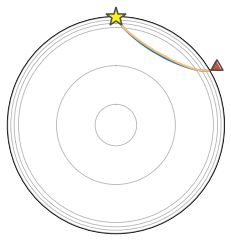

In [10]:
raypaths = model.get_ray_paths(source_depth_in_km=10, #kedalaman dlm km
                               distance_in_degree=60, # jarak dalam derajat
                              phase_list=["P","S"])#daftar fase yang akan diambil

ax = raypaths.plot_rays()

untuk mendapatkan angka waktu tibanya kita menggunakan indeksing dan atribut `.time` dan `.name`, contohnya untuk mendapatkan waktu tiba pertama maka:

In [11]:
first_arrival=arrivals[0]
nama_fase=first_arrival.name
waktu_tiba=first_arrival.time

print("Fase pertama datang {} pada {} sekon".format(nama_fase, waktu_tiba))

Fase pertama datang P pada 606.6711112198361 sekon


Untuk waktu tiba P jelas pertama sehingga kita menggunakan indeks 0 seperti contoh di atas, hanya untuk waktu tiba gelombang S sedikit perlu modifikasi karena bisa saja ada banyak fase P dan S dalam 1 kali kejadian, contoh:

In [12]:
arrivals = model.get_travel_times(source_depth_in_km=10,
                                      distance_in_degree=60,
                                      phase_list=["P","S"])
print(arrivals)

2 arrivals
	P phase arrival at 606.671 seconds
	S phase arrival at 1099.990 seconds


Pada contoh di atas ada 1 kedatangan gelombang P adn 1 kedatangan gelombang S, bagaimana cara mengambil gelombang S yang pertama? Kita bisa sedikit membuat algoritma:

Mengambil nama-nama fasenya dengan loop:

In [13]:
import numpy as np
phase_names=np.array([arr.name for arr in arrivals])
phase_names

array(['P', 'S'], dtype='<U1')

Mencari dimana letak indeks S:

In [14]:
S_indexes=np.where(phase_names=="S")
S_indexes

(array([1]),)

Mengambil indeks S paling pertama sebagai indeks waktu tiba S pertama kali:

In [15]:
S_index=S_indexes[0][0]
S_index

1

Memakai indeks tersebut untuk mengambil S pertama:

In [16]:
Sfirst_arrival=arrivals[S_index]
Snama_fase=Sfirst_arrival.name
Swaktu_tiba=Sfirst_arrival.time

print("Fase S pertama datang {} pada {} sekon".format(Snama_fase, Swaktu_tiba))

Fase S pertama datang S pada 1099.9898948001398 sekon


### Memanfaatkan `TauPyModel` untuk mencari jarak

Seperti yang sudah kita bahas di atas, `TauPyModel` berfungsi untuk mencari waktu tempuh gelombang. Dalam algoritma metode lingkaran kita harus melakukan sebaliknya yaitu dari waktu tempuh menjadi jarak. Oleh karena itu kita akan membuat kode singkat untuk membalik algoritmanya, dalam kasus ini kedalaman kita anggap tetap yaitu 10 km.

Langkah selanjutnya adalah kita mencoba masing-masing jarak dengan `for` *loop* dan menghitung nilai S-P dari `TauPyModel`: `SP_taup=arrivals[-1].time-arrivals[0].time`. Di bawah langkah ini ada kondisional yang menyatakan bila waktu S-P dari `TauPyModel` lebih kecil dari S-P stasiun yang bersangkutan maka nilai tersebut akan dipakai sebagai jarak, tetapi apabila nilai S-P dari `TauPyModel` lebih besar maka nilai jarak tidak diupdate. 

Sebagai bayangan jika kita akan menebak suatu jarak dengan waktu S-P adalah 345.773 sekon dan kedalaman gempa adalah 10 km dengan jangkauan tebakan kita adalah 22 sampai 25 dengan kelipatan 1:

P phase arrival at 606.671 seconds
S phase arrival at 1099.990 seconds

S-P = 493.319 sekitar 8 menit 22 detik

In [17]:
distance_list=np.arange(50,65,1) #jangkauan tebakan
SP=500 #SP (s)
depth=10 #km

initial_distance=distance_list[0]
for dist in distance_list:
    arrivals = model.get_travel_times(source_depth_in_km=depth,
                                      distance_in_degree=dist,
                                      phase_list=["P","S"])
    # waktu tiba P pasti paling pertama
    P_arrival = arrivals[0].time
    
    # waktu tiba S harus sedikit hati-hati karena bisa ada banyak P dan S
    phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
    S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
    S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
    S_arrival = arrivals[S_index].time # waktu tiba S
    
    # menghitung S-P dari TauP IASP91
    SP_taup = S_arrival-P_arrival
    
    if SP_taup<SP: #jika SP_taup < SP observasi maka jarak diupdate
        print("SP taup < SP: {} < {}".format(SP_taup,SP))
        print("Initial distance diupdate: {}".format(initial_distance))
        initial_distance = dist
    else: # jika tidak maka jarak tidak diupdate
        print("SP taup > SP: {} > {}".format(SP_taup,SP))
        print("Initial distance tidak diupdate: {}".format(initial_distance))
        
        
print("Jarak yang terpilih: {}".format(initial_distance))

SP taup < SP: 431.52699115604787 < 500
Initial distance diupdate: 50
SP taup < SP: 437.8698994308238 < 500
Initial distance diupdate: 50
SP taup < SP: 444.1772331405713 < 500
Initial distance diupdate: 51
SP taup < SP: 450.44861752049235 < 500
Initial distance diupdate: 52
SP taup < SP: 456.68557457114014 < 500
Initial distance diupdate: 53
SP taup < SP: 462.88518364263984 < 500
Initial distance diupdate: 54
SP taup < SP: 469.04860928306096 < 500
Initial distance diupdate: 55
SP taup < SP: 475.173213192532 < 500
Initial distance diupdate: 56
SP taup < SP: 481.25972076920175 < 500
Initial distance diupdate: 57
SP taup < SP: 487.3092213941676 < 500
Initial distance diupdate: 58
SP taup < SP: 493.3187835803037 < 500
Initial distance diupdate: 59
SP taup < SP: 499.2892788249935 < 500
Initial distance diupdate: 60
SP taup > SP: 505.22014975794787 > 500
Initial distance tidak diupdate: 61
SP taup > SP: 511.1094208334814 > 500
Initial distance tidak diupdate: 61
SP taup > SP: 516.959042422289

Contoh di atas memperlihatkan bahwa nilai jarak yang terpilih adalah 60 karena saat dicoba nilai SPnya 499.2892788249935, lebih kecil dari 500 atau SP pengamatan. Saat jarak 61 terlihat bahwa nilai sudah lebih besar dari 500 yaitu 505.22014975794787 sehingga jarak 61 seterusnya tidak dipakai.

In [18]:
distance_list=np.arange(50,65,1)
SP=500
depth=10 #km

initial_distance=distance_list[0]

for dist in distance_list:
    arrivals = model.get_travel_times(source_depth_in_km=depth,
                                      distance_in_degree=dist,
                                      phase_list=["P","S"])
    P_arrival = arrivals[0].time
    
    # waktu tiba S harus sedikit hati-hari karena bisa ada banyak P dan S
    phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
    S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
    S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
    S_arrival = arrivals[S_index].time # waktu tiba S
    
    SP_taup = S_arrival-P_arrival
    
    if SP_taup<SP:
        initial_distance = dist
        print("SP taup < SP: {} < {}".format(SP_taup,SP))
        print("Initial distance diupdate: {}".format(initial_distance))
        SP_error=abs(SP_taup-SP) #menambah perhitungan SP_error
        
    else:
        SP_error_check = abs(SP_taup-SP)
        if SP_error_check < SP_error: # jika SP_error sekarang < SP_error sebelumnya maka jarak tetap diupdate
            print("SP taup > SP: {} > {}".format(SP_taup,SP))
            print("Tetapi SP_error < SP_error_sebelumnya: {} < {}".format(SP_error_check, SP_error))
            initial_distance = dist
            print("Initial distance diupdate: {}".format(initial_distance))
            
        else:
            print("SP taup > SP: {} > {}".format(SP_taup,SP))
            print("Initial distance tidak diupdate: {}".format(initial_distance))
        
        
print("Jarak yang terpilih: {}".format(initial_distance))

SP taup < SP: 431.52699115604787 < 500
Initial distance diupdate: 50
SP taup < SP: 437.8698994308238 < 500
Initial distance diupdate: 51
SP taup < SP: 444.1772331405713 < 500
Initial distance diupdate: 52
SP taup < SP: 450.44861752049235 < 500
Initial distance diupdate: 53
SP taup < SP: 456.68557457114014 < 500
Initial distance diupdate: 54
SP taup < SP: 462.88518364263984 < 500
Initial distance diupdate: 55
SP taup < SP: 469.04860928306096 < 500
Initial distance diupdate: 56
SP taup < SP: 475.173213192532 < 500
Initial distance diupdate: 57
SP taup < SP: 481.25972076920175 < 500
Initial distance diupdate: 58
SP taup < SP: 487.3092213941676 < 500
Initial distance diupdate: 59
SP taup < SP: 493.3187835803037 < 500
Initial distance diupdate: 60
SP taup < SP: 499.2892788249935 < 500
Initial distance diupdate: 61
SP taup > SP: 505.22014975794787 > 500
Initial distance tidak diupdate: 61
SP taup > SP: 511.1094208334814 > 500
Initial distance tidak diupdate: 61
SP taup > SP: 516.959042422289

Kita sudah mendapatkan jarak yang nilai SPnya lebih mendekati yaitu 61 derajat.

### Menentukan range tebakan jarak

Kita bisa mencocokkan SP dengan kurva waktu tempuh, tetapi SP kita harus konversi dulu dalam menit:

In [19]:
print(KAPI_SP/60, MBWA_SP/60, BMEBF_SP/60)

0.7166666666666667 2.55 1.9333333333333333


dengan menggunakan Tau P kita bisa membuat kurva waktu tempuh:

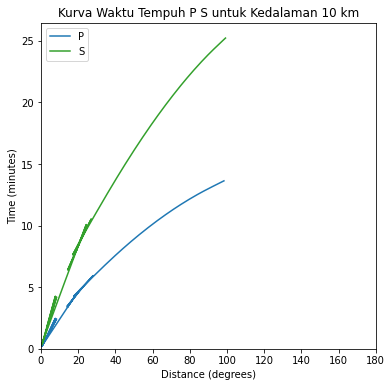

In [20]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax = plot_travel_times(source_depth=10, phase_list=["P", "S"],
                       ax=ax, fig=fig, verbose=True,
                      show=False)
ax.set_title("Kurva Waktu Tempuh P S untuk Kedalaman 10 km")
ax.grid()

Karena S-P data kita dari 4,25 sampai 4,8, dengan melihat kurva di atas kita bisa zoom di sekitar 10 sampai 40 derajat:

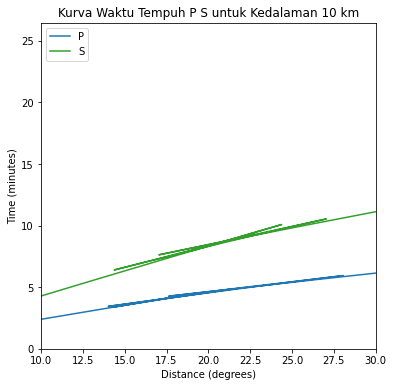

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = plot_travel_times(source_depth=10, phase_list=["P", "S"],
                       ax=ax, fig=fig, verbose=True, min_degrees=10, max_degrees=30, #zoom
                      show=False)
ax.set_title("Kurva Waktu Tempuh P S untuk Kedalaman 10 km")
ax.grid()

dari kurva *zoom* di atas kita kemudian memilih *range* tebakan dari 13 sampai 28 derajat.

### Implementasi untuk mencari jarak stasiun-gempa yang benar

Untuk mencari jarak yang tepat di setiap stasiun kita menambahkan satu *for* loop lagi dan jangkauan tebakan dari 20 sampai 30 derajat dengan lompatan yang lebih halus yaitu 0,1:

In [22]:
distance_list=np.arange(13,28,0.1)
station_SP_list=[KAPI_SP,MBWA_SP,BMEBF_SP]

sta_distance_list=[]
for sta_SP in station_SP_list:
    initial_distance=distance_list[0]
    for dist in distance_list:
        arrivals = model.get_travel_times(source_depth_in_km=depth,
                                          distance_in_degree=dist,
                                          phase_list=["P","S"])
        P_arrival = arrivals[0].time

        # waktu tiba S harus sedikit hati-hari karena bisa ada banyak P dan S
        phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
        S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
        S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
        S_arrival = arrivals[S_index].time # waktu tiba S

        SP_taup = S_arrival-P_arrival

        if SP_taup<sta_SP:
            initial_distance = dist
            SP_error=abs(SP_taup-sta_SP) #menambah perhitungan SP_error

        else:
            SP_error_check = abs(SP_taup-sta_SP)
            if SP_error_check < SP_error: # jika SP_error sekarang < SP_error sebelumnya maka jarak tetap diupdate
                initial_distance = dist

    sta_distance_list.append(initial_distance)
sta_distance_list

[13.0, 13.699999999999998, 13.0]

dari algoritma di atas kita mendapatkan nilai jarak masing-masing untuk KAPI,MBWA, dan BMEBF adalah 13.0, 13.7 dan 13.0.

### Mengeplot hasil dengan `matplotlib`

Lingkaran dapat kita plot menggunakan fungsi `plt.Circle` dengan titik tengah berupa koordinat stasiun dan jari-jari berupa jarak yang sebelumnya kita dapatkan:

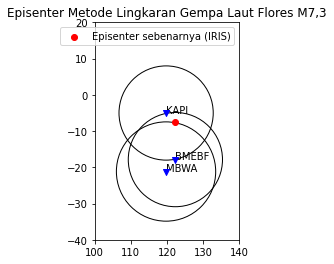

In [25]:
import matplotlib.pyplot as plt

# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
MBWA_coor=(119.7313,-21.159)
BMEBF_coor=(122.309427,-17.86832)
#list nama stasiun
nama_stasiun = ["KAPI","MBWA","BMEBF"]

figure, ax = plt.subplots()

ax.set_aspect(1) #agar proporsi x dan y sama

# plot lingkaran dan titik
for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue") #titik stasiun
    draw_circle =plt.Circle(sta, rad, fill=False) #lingkaran
    ax.add_artist(draw_circle) #lingkatan
    ax.annotate(nsta, sta) # nama stasiun


ax.set_title('Episenter Metode Lingkaran Gempa Laut Flores M7,3')
ax.set_xlim(100,140)
ax.set_ylim(-40,20)
ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")
ax.legend()
plt.show()

### Mengeplot hasil dengan `cartopy` 

In [ ]:
#pip install cartopy

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


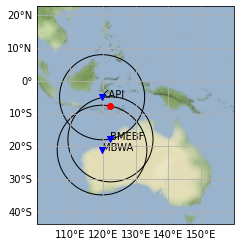

In [26]:
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((100,160,-40,20))

# Add stamen background
stamen_terrain = cimgt.Stamen('terrain-background') ##maps.stamen.com
ax.add_image(stamen_terrain,2)

ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, zorder=11)

gl.xlabels_top = False
gl.ylabels_right = False

for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)


ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")

plt.savefig("output/demo_epi.png",dpi=300)

### Rekap kode

Jika kode-kode di atas direkap dalam 1 bagian maka menjadi:

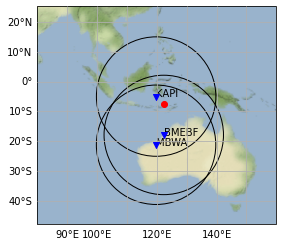

In [27]:
import numpy as np
from obspy import UTCDateTime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
from obspy.taup import TauPyModel

# MODEL KECEPATAN
model = TauPyModel(model="iasp91")

# KEDALAMAN
depth=10 #km

# DATA
KAPI_P = UTCDateTime("2021-12-14T03:21:19")
KAPI_S = UTCDateTime("2021-12-14T03:22:02")

MBWA_P = UTCDateTime("2021-12-14T03:23:40")
MBWA_S = UTCDateTime("2021-12-14T03:26:13")

BMEBF_P = UTCDateTime("2021-12-14T03:22:53")
BMEBF_S = UTCDateTime("2021-12-14T03:24:49")

# KOORDINAT dan NAMA
KAPI_coor=(119.7517,-5.0142)
MBWA_coor=(119.7313,-21.159)
BMEBF_coor=(122.309427,-17.86832)
nama_stasiun = ["KAPI","MBWA","BMEBF"]

# SP
KAPI_SP = KAPI_S-KAPI_P
MBWA_SP = MBWA_S-MBWA_P
BMEBF_SP = BMEBF_S-BMEBF_P

# MENCARI JARAK
distance_list=np.arange(20,40,0.1) #Range tebakan
station_SP_list=[KAPI_SP,MBWA_SP,BMEBF_SP]

sta_distance_list=[]
for sta_SP in station_SP_list:
    initial_distance=distance_list[0]
    for dist in distance_list:
        arrivals = model.get_travel_times(source_depth_in_km=depth,
                                          distance_in_degree=dist,
                                          phase_list=["P","S"])
        P_arrival = arrivals[0].time

        # waktu tiba S harus sedikit hati-hari karena bisa ada banyak P dan S
        phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
        S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
        S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
        S_arrival = arrivals[S_index].time # waktu tiba S

        SP_taup = S_arrival-P_arrival

        if SP_taup<sta_SP:
            initial_distance = dist
            SP_error=abs(SP_taup-sta_SP) #menambah perhitungan SP_error

        else:
            SP_error_check = abs(SP_taup-sta_SP)
            if SP_error_check < SP_error: # jika SP_error sekarang < SP_error sebelumnya maka jarak tetap diupdate
                initial_distance = dist

    sta_distance_list.append(initial_distance)

    
# PLOT
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((80,160,-40,20))

# Add stamen background
stamen_terrain = cimgt.Stamen('terrain-background') ##maps.stamen.com
ax.add_image(stamen_terrain,2) # 2 merupakan level zoom, semakin besar semakin detail tetapi semakin lama proses download, gunakan dengan bijak

ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, zorder=11)

gl.xlabels_top = False
gl.ylabels_right = False

for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)


ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")

plt.savefig("output/demo_epi.png",dpi=300)

### Tambahan: Mendapatkan titik episenter

Dengan menyederhanakan menjadi bidang datar kita dapat memanfaatkan pengetahuan geometri untuk mendapatkan dua titik perpotongan dua lingkaran:

In [28]:
# referensi: https://stackoverflow.com/questions/64800285/intersection-coordinates-lat-lon-of-two-circles-given-the-coordinates-of-the
import math
def circle_intersection(x0, y0, r0, x1, y1, r1):

    d = math.sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2)

    if d > r0 + r1:             # non intersecting
        return None
    if d < abs(r0 - r1):        # one circle within other
        return None
    if d == 0 and r0 == r1:     # coincident circles
        return None

    a = (r0 ** 2 - r1 ** 2 + d ** 2) / (2 * d)
    h = math.sqrt(r0 ** 2 - a ** 2)
    x2 = x0 + a * (x1 - x0) / d
    y2 = y0 + a * (y1 - y0) / d
    x3 = x2 + h * (y1 - y0) / d
    y3 = y2 - h * (x1 - x0) / d

    x4 = x2 - h * (y1 - y0) / d
    y4 = y2 + h * (x1 - x0) / d

    return (x3, y3), (x4, y4)

kita gunakan fungsi di atas untuk menghitung perpotongan masing-masing pasangan lingkaran stasiun:

In [29]:
TP_1, TP_2 = circle_intersection(KAPI_coor[0], KAPI_coor[1], sta_distance_list[0],\
                   MBWA_coor[0], MBWA_coor[1], sta_distance_list[1])

TC_1, TC_2 = circle_intersection(KAPI_coor[0], KAPI_coor[1], sta_distance_list[0],\
                   BMEBF_coor[0], BMEBF_coor[1], sta_distance_list[2])

PC_1, PC_2 = circle_intersection(MBWA_coor[0], MBWA_coor[1], sta_distance_list[1],\
                   BMEBF_coor[0], BMEBF_coor[1], sta_distance_list[2])

print(TP_1, TP_2)

(101.44298313106552, -13.063478639306393) (138.0400168689345, -13.109721360693609)


kemudian kita ubah bentuk ke dalam list untuk mempermudah:

In [30]:
#KAPI AUDHS
TPx=[TP_1[0], TP_2[0]]
TPy=[TP_1[1], TP_2[1]]

#KAPI BMEBF
TCx=[TC_1[0], TC_2[0]]
TCy=[TC_1[1], TC_2[1]]

# AUDHS BMEBF
PCx=[PC_1[0], PC_2[0]]
PCy=[PC_1[1], PC_2[1]]

dengan masing-masing dua titik perpotongan kita kemudian dapat mengplot garis *chord*:

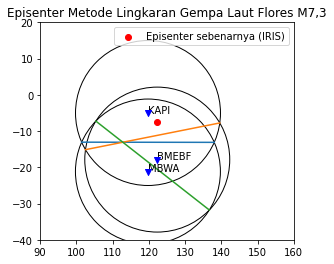

In [31]:
import matplotlib.pyplot as plt

# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
MBWA_coor=(119.7313,-21.159)
BMEBF_coor=(122.309427,-17.86832)

nama_stasiun = ["KAPI","MBWA","BMEBF"]

figure, ax = plt.subplots()

ax.set_aspect(1)
for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)

# plot garis chord
ax.plot(TPx, TPy)
ax.plot(TCx, TCy)
ax.plot(PCx, PCy)

ax.set_title('Episenter Metode Lingkaran Gempa Laut Flores M7,3')
ax.set_xlim(90,160)
ax.set_ylim(-40,20)
ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")
ax.legend()
plt.show()

Memanfaatkan fungsi `linregress` dari `scipy` kita dengan mudah dapat mendapatkan nilai *slope* dan *intercept* masing-masing garis *chord*:

In [32]:
from scipy import stats
result = stats.linregress(TPx, TPy)
mTP=result.slope
cTP=result.intercept

result = stats.linregress(TCx, TCy)
mTC=result.slope
cTC=result.intercept

result = stats.linregress(PCx, PCy)
mPC=result.slope
cPC=result.intercept

menggunakan persamaan sederhana untuk mendapatkan perpotongan dua garis:

In [33]:
def two_intersection(m1,c1,m2,c2):
    x=(c2-c1)/(m1-m2)
    y=m1*x+c1
    return x,y

perpotongan setiap pasangan akan dikalkulasi kemudian nantinya direrata:

In [34]:
inter_TPPC=two_intersection(mTP, cTP, mPC, cPC)
inter_TPTC=two_intersection(mTP, cTP, mTC, cTC)
inter_PCTC=two_intersection(mPC, cPC, mTC, cTC)

print(inter_TPPC)
print(inter_TPTC)
print(inter_PCTC)

(112.80578119628979, -13.077836270279244)
(112.80578119628979, -13.077836270279244)
(112.80578119628977, -13.07783627027925)


dari titik potong setiap pasang ternyata perbedaannya kecil sampai 12 angka di belakang koma, pererataan dilakukan dengan cara sederhana:

In [35]:
x_av=(inter_TPPC[0]+inter_TPTC[0]+inter_PCTC[0])/3
y_av=(inter_TPPC[1]+inter_TPTC[1]+inter_PCTC[1])/3

print("Episenter hasil kalkulasi",x_av, y_av)
print("Episenter sebenarnya: 122.25,-7.59")

Episenter hasil kalkulasi 112.80578119628979 -13.077836270279244
Episenter sebenarnya: 122.25,-7.59


Kita dapat plotkan dan akan di *zoom* agar lebih terlihat:

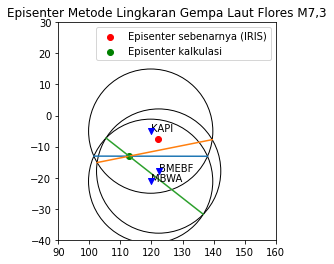

In [36]:
import matplotlib.pyplot as plt

# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
MBWA_coor=(119.7313,-21.159)
BMEBF_coor=(122.309427,-17.86832)

nama_stasiun = ["KAPI","MBWA","BMEBF"]

figure, ax = plt.subplots()

ax.set_aspect(1)
for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)

ax.plot(TPx, TPy)
ax.plot(TCx, TCy)
ax.plot(PCx, PCy)

ax.set_title('Episenter Metode Lingkaran Gempa Laut Flores M7,3')
ax.set_xlim(90,160)
ax.set_ylim(-40,30)
ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")
ax.scatter(x_av,y_av,color="green", label="Episenter kalkulasi")
ax.legend()
plt.show()

/opt/miniconda3/lib/python3.9/site-packages/cartopy/io/img_tiles.py:116: UserWarning: Cartopy created the following directory to cache GoogleWTS tiles: /var/folders/zv/n2g_d_rx61z5l6fj0mt0bzp80000gn/T/cartopy_cache_dir/GoogleTiles
  warnings.warn(


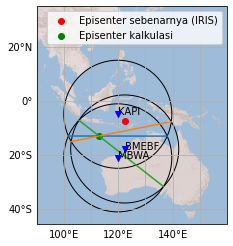

In [37]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((90,160,-40,30))

# Add custom background
terrain = cimgt.GoogleTiles(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg',\
                           cache=True)
ax.add_image(terrain,8) # 8 merupakan level zoom dari basemap, 
                    #semakin besar semakin detail tetapi semakin lama proses download, gunakan dengan bijak

ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, zorder=1)

gl.xlabels_top = False
gl.ylabels_right = False

for sta,rad,nsta in zip([KAPI_coor, MBWA_coor, BMEBF_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)

ax.plot(TPx, TPy)
ax.plot(TCx, TCy)
ax.plot(PCx, PCy)

ax.scatter(122.25,-7.59,color="red", label="Episenter sebenarnya (IRIS)")
ax.scatter(x_av,y_av,color="green", label="Episenter kalkulasi")

ax.legend()
plt.savefig("output/demo_epi_pt.png",dpi=300)

In [ ]:
# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
AUDHS_coor=(130.832993,-12.44)
BMEBF_coor=(122.309427,-17.86832)

In [70]:
#KAPI-AUDHS
import math

def degree_to_distance(lat1, lon1, lat2, lon2):
    # Konversi ke radian
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Jarak dalam kilometer

    return distance

# Contoh penggunaan
lat1 = 119.7517
lon1 = -5.0142
lat2 = 130.832993
lon2 = -12.44

result = degree_to_distance(lat1, lon1, lat2, lon2)
print("Jarak antara kedua titik adalah:", result, "kilometer")


Jarak antara kedua titik adalah: 1319.3468317993847 kilometer


In [ ]:
# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
AUDHS_coor=(130.832993,-12.44)
BMEBF_coor=(122.309427,-17.86832)

In [71]:
#KAPI-BMEBF
import math

def degree_to_distance(lat1, lon1, lat2, lon2):
    # Konversi ke radian
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Jarak dalam kilometer

    return distance

# Contoh penggunaan
lat1 = 119.7517
lon1 = -5.0142
lat2 = 122.309427
lon2 = -17.86832

result = degree_to_distance(lat1, lon1, lat2, lon2)
print("Jarak antara kedua titik adalah:", result, "kilometer")


Jarak antara kedua titik adalah: 788.1999231421458 kilometer


In [ ]:
# koordinat stasiun
KAPI_coor=(119.7517,-5.0142)
AUDHS_coor=(130.832993,-12.44)
BMEBF_coor=(122.309427,-17.86832)

In [72]:
#AUDHS-BMEBF
import math

def degree_to_distance(lat1, lon1, lat2, lon2):
    # Konversi ke radian
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Jarak dalam kilometer

    return distance

# Contoh penggunaan
lat1 = 130.832993
lon1 = -12.44
lat2 = 122.309427
lon2 = -17.86832

result = degree_to_distance(lat1, lon1, lat2, lon2)
print("Jarak antara kedua titik adalah:", result, "kilometer")


Jarak antara kedua titik adalah: 1012.9257873972 kilometer


In [ ]:
KAPI_coor=(119.7517,-5.0142)
Episenter=(122.25,-7.59)

In [73]:
#KAPI-Episenter Gempa
import math

def degree_to_distance(lat1, lon1, lat2, lon2):
    # Konversi ke radian
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Jarak dalam kilometer

    return distance

# Contoh penggunaan
lat1 = 119.7517
lon1 = -5.0142
lat2 = 122.25
lon2 = -7.59

result = degree_to_distance(lat1, lon1, lat2, lon2)
print("Jarak antara kedua titik adalah:", result, "kilometer")

Jarak antara kedua titik adalah: 314.48191084350776 kilometer


## Referensi

Havskov J., Bormann P., Schweitzer J., 2002, Earthquake location, New Manual on Seismological Observatory Practice: GFZ Potsdam

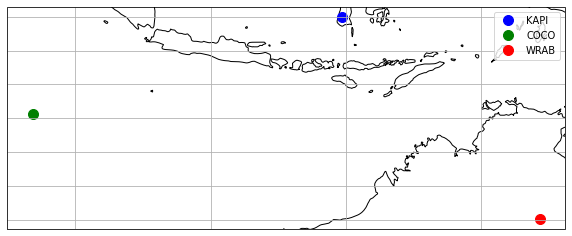

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Gambar batas wilayah dan garis koordinat
ax.coastlines()
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, transform=ccrs.PlateCarree(), label='KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, transform=ccrs.PlateCarree(), label='COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, transform=ccrs.PlateCarree(), label='WRAB')

# Tambahkan legenda
plt.legend()

# Tampilkan peta
# plt.title('Peta Lokasi Stasiun Gempa Bumi')
plt.show()

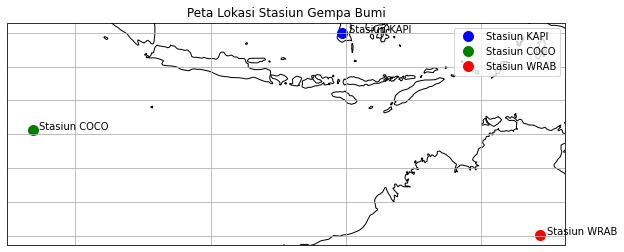

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Gambar batas wilayah dan garis koordinat
ax.coastlines()
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi')
plt.legend()
plt.show()

AttributeError: module 'cartopy.feature' has no attribute 'NETCDFFeature'

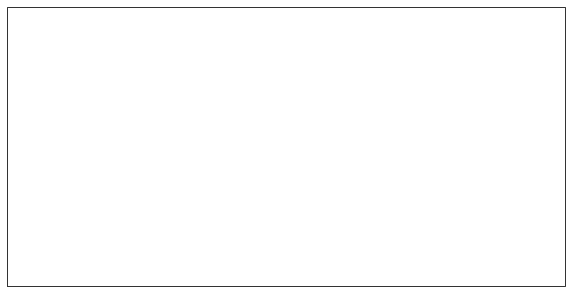

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -7.12345, 112.54321
coco_lat, coco_lon = -6.78901, 106.54321
wrab_lat, wrab_lon = -5.12345, 106.78901

# Inisialisasi peta menggunakan Plate Carree projection dan bingkai petanya menggunakan peta topografi offline
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta topografi dari berkas NETCDF
ax.add_feature(cfeature.NETCDFFeature("topo_Indonesia.nc", 'topo', levels=[0, 1000, 2000, 3000], alpha=0.7))

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi')
plt.legend()
plt.show()

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import StamenTerrain

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -7.12345, 112.54321
coco_lat, coco_lon = -6.78901, 106.54321
wrab_lat, wrab_lon = -5.12345, 106.78901

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain
stamen_terrain = StamenTerrain()
ax.add_image(stamen_terrain, 9)

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi')
plt.legend()
plt.show()


ImportError: cannot import name 'StamenTerrain' from 'cartopy.io.img_tiles' (/opt/miniconda3/lib/python3.9/site-packages/cartopy/io/img_tiles.py)

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -7.12345, 112.54321
coco_lat, coco_lon = -6.78901, 106.54321
wrab_lat, wrab_lon = -5.12345, 106.78901

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain menggunakan contextily
ctx.add_basemap(ax, zoom=9, source=ctx.providers.Stamen.Terrain)

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi')
plt.legend()
plt.show()

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -7.12345, 112.54321
coco_lat, coco_lon = -6.78901, 106.54321
wrab_lat, wrab_lon = -5.12345, 106.78901

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain menggunakan cartopy
stamen_terrain = StamenTerrain()
ax.add_image(stamen_terrain, 9)

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi dan Topografi')
plt.legend()

# Tambahkan peta topografi menggunakan GoogleTiles
topo_tiles = GoogleTiles(style='terrain')
ax.add_image(topo_tiles, 9)

# Tampilkan peta dengan topografi
plt.show()


ImportError: cannot import name 'StamenTerrain' from 'cartopy.io.img_tiles' (/opt/miniconda3/lib/python3.9/site-packages/cartopy/io/img_tiles.py)

AttributeError: module 'cartopy.feature' has no attribute 'STAMEN_TERRAIN'

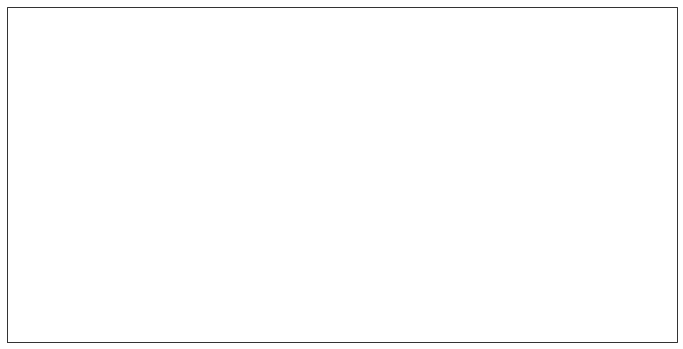

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain
ax.add_feature(cfeature.STAMEN_TERRAIN)

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi dan Topografi dari Stamen Terrain')
plt.legend()

# Tampilkan peta dengan topografi
plt.show()


In [9]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain menggunakan contextily
ctx.add_basemap(ax, zoom=9, source=ctx.providers.Stamen.Terrain)

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi dan Topografi dari Stamen Terrain')
plt.legend()

# Tampilkan peta dengan topografi
plt.show()


TypeError: imsave() got an unexpected keyword argument 'extent'

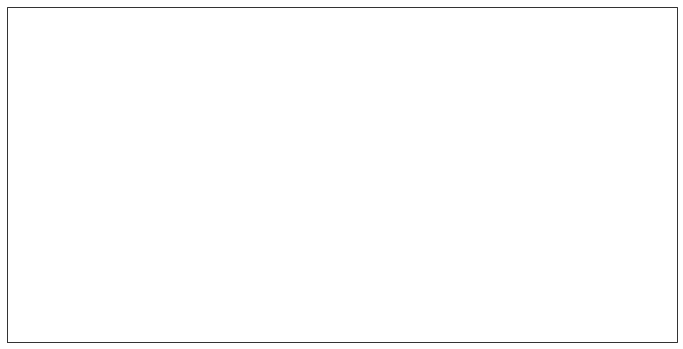

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain menggunakan contextily dan simpan ke file gambar
filename = "stamen_terrain.png"
ctx_bounds = (kapi_lon - 1, kapi_lat - 1, kapi_lon + 1, kapi_lat + 1)
ctx_img, extent = ctx.bounds2img(*ctx_bounds, zoom=9, source=ctx.providers.Stamen.Terrain)
plt.imsave(filename, ctx_img, origin='upper', extent=extent)

# Tambahkan peta latar belakang dari file gambar
ax.imshow(plt.imread(filename), origin='upper', extent=extent, transform=ccrs.PlateCarree())

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi dan Topografi dari Stamen Terrain')
plt.legend()

# Tampilkan peta dengan topografi
plt.show()

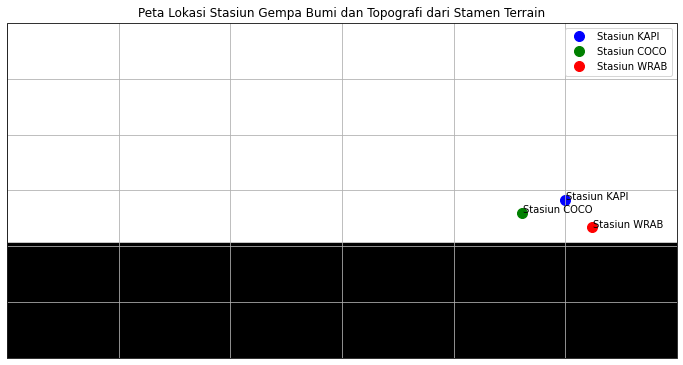

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain menggunakan contextily dan simpan ke file gambar
filename = "stamen_terrain.png"
ctx_bounds = (kapi_lon - 1, kapi_lat - 1, kapi_lon + 1, kapi_lat + 1)
ctx_img, extent = ctx.bounds2img(*ctx_bounds, zoom=9, source=ctx.providers.Stamen.Terrain)
plt.imshow(ctx_img, origin='upper', extent=extent, transform=ccrs.PlateCarree())
plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300)

# Tambahkan peta latar belakang dari file gambar
ax.imshow(plt.imread(filename), origin='upper', extent=extent, transform=ccrs.PlateCarree())

# Tambahkan garis-garis koordinat
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, label='Stasiun KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, label='Stasiun COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, label='Stasiun WRAB')

# Tambahkan teks label untuk setiap stasiun
ax.text(kapi_lon + 0.5, kapi_lat, 'Stasiun KAPI', transform=ccrs.Geodetic())
ax.text(coco_lon + 0.5, coco_lat, 'Stasiun COCO', transform=ccrs.Geodetic())
ax.text(wrab_lon + 0.5, wrab_lat, 'Stasiun WRAB', transform=ccrs.Geodetic())

# Tampilkan peta
plt.title('Peta Lokasi Stasiun Gempa Bumi dan Topografi dari Stamen Terrain')
plt.legend()

# Tampilkan peta dengan topografi
plt.show()


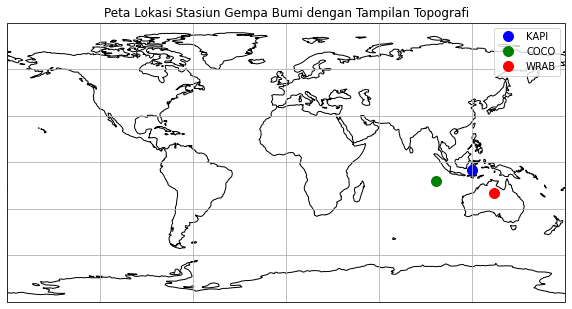

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

# Koordinat Stasiun KAPI, COCO, dan WRAB (latitude dan longitude)
kapi_lat, kapi_lon = -5.0142, 119.7517
coco_lat, coco_lon = -12.1901, 96.8349
wrab_lat, wrab_lon = -19.9336, 134.36

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tambahkan peta latar belakang dari Stamen Terrain menggunakan contextily
ctx_bounds = (kapi_lon - 1, kapi_lat - 1, kapi_lon + 1, kapi_lat + 1)
ctx_img, extent = ctx.bounds2img(*ctx_bounds, zoom=9, source=ctx.providers.Stamen.Terrain)
ax.imshow(ctx_img, origin='upper', extent=extent, transform=ccrs.PlateCarree())

# Gambar batas wilayah dan garis koordinat
ax.coastlines()
ax.gridlines()

# Gambar stasiun KAPI, COCO, dan WRAB di peta
ax.plot(kapi_lon, kapi_lat, 'bo', markersize=10, transform=ccrs.PlateCarree(), label='KAPI')
ax.plot(coco_lon, coco_lat, 'go', markersize=10, transform=ccrs.PlateCarree(), label='COCO')
ax.plot(wrab_lon, wrab_lat, 'ro', markersize=10, transform=ccrs.PlateCarree(), label='WRAB')

# Tambahkan legenda
plt.legend()

# Tampilkan peta dengan tampilan topografi
plt.title('Peta Lokasi Stasiun Gempa Bumi dengan Tampilan Topografi')
plt.show()

In [1]:
pip install cartopy requests

Note: you may need to restart the kernel to use updated packages.


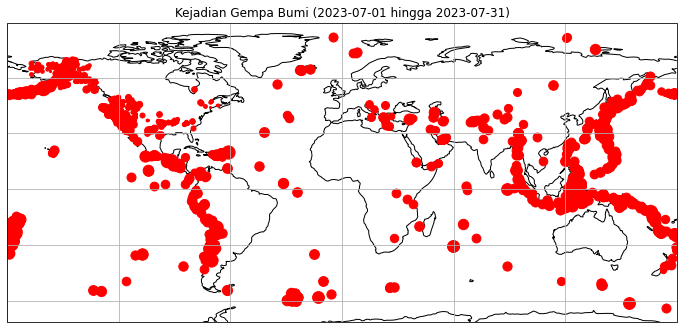

In [2]:
import requests
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Fungsi untuk mendapatkan data gempa bumi dari USGS
def get_earthquake_data(start_date, end_date):
    url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime={start_date}&endtime={end_date}"
    response = requests.get(url)
    data = response.json()
    return data

# Periode waktu yang ingin ditampilkan (misalnya, 30 hari terakhir)
start_date = "2023-07-01"
end_date = "2023-07-31"

# Dapatkan data gempa bumi dari USGS
earthquake_data = get_earthquake_data(start_date, end_date)

# Inisialisasi peta menggunakan Plate Carree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Gambar batas wilayah dan garis koordinat
ax.coastlines()
ax.gridlines()

# Gambar kejadian gempa bumi pada peta
for earthquake in earthquake_data['features']:
    longitude = earthquake['geometry']['coordinates'][0]
    latitude = earthquake['geometry']['coordinates'][1]
    magnitude = earthquake['properties']['mag']
    ax.plot(longitude, latitude, 'ro', markersize=magnitude*2, transform=ccrs.PlateCarree())

# Tampilkan peta dengan kejadian gempa bumi
plt.title(f'Kejadian Gempa Bumi ({start_date} hingga {end_date})')
plt.show()
